# Train and evaluate models

This notebooks shows how to train, predict and cluster models. Alternatively to executing each step here, the cli can be used for training models:
```
campa train all --config $CAMPA_DIR/notebooks/params/example_experiment_params.py
```

for evaluation or comparison only, use
```
campa train compare --experiment-dir test
```

The models will be saved in `EXPERIMENT_DIR/test`, with the `EXPERIMENT_DIR` being the custom experiment path set up in `campa.ini`.

In [1]:
from campa.tl import (
    Cluster,
    Estimator,
    Predictor,
    Experiment,
    ModelComparator,
    run_experiments,
)
from campa.constants import EXPERIMENT_DIR, get_data_config

# comment in to get logging messages
# logging.basicConfig(level=logging.INFO)


data_config = get_data_config("TestData")
print(EXPERIMENT_DIR)

Reading config from /mnt/home/icb/hannah.spitzer/projects/pelkmans/software_new/campa/config.ini
/home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new


## Experiment class handles config files
For training and evaluating models, an `experiment_params.py` file is used. This file contains several model/experiment parameters for easy training of several models at the same time. The parameter dictionaries contain several sections:
- experiment (where to save experiment)
- data (which dataset to use for training)
- model (model class definition)
- training (training hyperparameters)
- evaluation (evaluation on val/test split)
- cluster (clustering on val/test split)

The `Experiment` class is initialised from a parameter dictionary for one specific experiment and is passed to specific classes for training (`Estimator`), evaluation (`Predictor`), and clustering (`Cluster`).

Here, we are going to be using an [example experiment config](params/example_experiment_params.py) that creates three models:
- `condVAE`: a cVAE model trained on the example dataset created in [the NNDataset tutorial](nn_dataset.ipynb), using perturbation (unperturbed or Meayamycin) and cell cycle as conditions
- `VAE`: a VAE model trained on the example dataset created in [the NNDataset tutorial](nn_dataset.ipynb), 
- `MPPleiden`: a non-traineable model that is used to create a direct pixel clustering, to compare with the cVAE latent space clustering.


In [2]:
# get Experiments from config
exps = Experiment.get_experiments_from_config("params/example_experiment_params.py")

# each experiment has one specific config
exps[0].config

{'experiment': {'dir': 'test', 'name': 'VAE', 'save_config': True},
 'data': {'data_config': 'TestData',
  'dataset_name': '184A1_test_dataset',
  'output_channels': None},
 'model': {'model_cls': <ModelEnum.VAEModel: 'VAEModel'>,
  'model_kwargs': {'num_neighbors': 3,
   'num_channels': 34,
   'num_output_channels': 34,
   'latent_dim': 16,
   'encoder_conv_layers': [32],
   'encoder_conv_kernel_size': [1],
   'encoder_fc_layers': [32, 16],
   'decoder_fc_layers': []},
  'init_with_weights': False},
 'training': {'learning_rate': 0.001,
  'epochs': 10,
  'batch_size': 128,
  'loss': {'decoder': <LossEnum.SIGMA_MSE: 'sigma_vae_mse'>,
   'latent': <LossEnum.KL: 'kl_divergence'>},
  'loss_weights': {'decoder': 1},
  'loss_warmup_to_epoch': {},
  'metrics': {'decoder': <LossEnum.MSE_metric: 'mean_squared_error_metric'>,
   'latent': <LossEnum.KL: 'kl_divergence'>},
  'save_model_weights': True,
  'save_history': True,
  'overwrite_history': True},
 'evaluation': {'split': 'val',
  'predic

## Running experiments with the high-level api

The high-level api contains a `run_experiments` function that wraps training, evaluation, clustering and comparison of models in one call. 

In [3]:
run_experiments(exps, mode="trainval")

Running experiment for ['VAE', 'CondVAE_pert-CC', 'MPPleiden'] with mode trainval
Training model for VAE


2022-03-24 12:59:00.791318: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10


2022-03-24 12:59:01.713205: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


394/394 [==============================] - 11s 21ms/step - loss: 131.2656 - decoder_loss: 125.0112 - latent_loss: 6.2538 - decoder_mean_squared_error: 0.1220 - latent_kl_loss: 6.2568 - val_loss: -1176.3411 - val_decoder_loss: -1185.0352 - val_latent_loss: 8.6940 - val_decoder_mean_squared_error: 0.0349 - val_latent_kl_loss: 8.6969
Epoch 2/10
394/394 [==============================] - 10s 21ms/step - loss: -1403.4746 - decoder_loss: -1411.3853 - latent_loss: 7.9109 - decoder_mean_squared_error: 0.0307 - latent_kl_loss: 7.9107 - val_loss: -1446.7345 - val_decoder_loss: -1454.6052 - val_latent_loss: 7.8704 - val_decoder_mean_squared_error: 0.0310 - val_latent_kl_loss: 7.8726
Epoch 3/10
394/394 [==============================] - 11s 26ms/step - loss: -1570.6732 - decoder_loss: -1578.2754 - latent_loss: 7.6021 - decoder_mean_squared_error: 0.0285 - latent_kl_loss: 7.6022 - val_loss: -1489.6045 - val_decoder_loss: -1497.3337 - val_latent_loss: 7.7290 - val_decoder_mean_squared_error: 0.0304 

/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Saving partial keys of mpp data without a base_data_dir to enable correct loading
Saving partial keys of mpp data without a base_data_dir to enable correct loading


Training model for CondVAE_pert-CC
Epoch 1/10
394/394 [==============================] - 11s 22ms/step - loss: -203.9261 - decoder_loss: -211.9119 - latent_loss: 7.9859 - decoder_mean_squared_error: 0.1009 - latent_kl_loss: 7.9916 - val_loss: -1464.0922 - val_decoder_loss: -1474.7441 - val_latent_loss: 10.6516 - val_decoder_mean_squared_error: 0.0307 - val_latent_kl_loss: 10.6554
Epoch 2/10
394/394 [==============================] - 9s 19ms/step - loss: -1896.3198 - decoder_loss: -1905.9409 - latent_loss: 9.6205 - decoder_mean_squared_error: 0.0245 - latent_kl_loss: 9.6175 - val_loss: -1812.4351 - val_decoder_loss: -1822.0771 - val_latent_loss: 9.6426 - val_decoder_mean_squared_error: 0.0263 - val_latent_kl_loss: 9.6459
Epoch 3/10
394/394 [==============================] - 9s 19ms/step - loss: -2112.7600 - decoder_loss: -2121.4824 - latent_loss: 8.7233 - decoder_mean_squared_error: 0.0222 - latent_kl_loss: 8.7177 - val_loss: -1921.2258 - val_decoder_loss: -1929.9237 - val_latent_loss: 

/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Saving partial keys of mpp data without a base_data_dir to enable correct loading


Saving partial keys of mpp data without a base_data_dir to enable correct loading


Clustering results for MPPleiden


/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Saving partial keys of mpp data without a base_data_dir to enable correct loading
Saving partial keys of mpp data without a base_data_dir to enable correct loading


## Running experiments with Estimator and Predictor
### Neural network training with Estimator
The `Estimator` class handles model setup, training, and prediction. It is instanciated from an `Experiment`.


In [3]:
est = Estimator(exps[0])

2022-03-24 10:49:31.288207: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The `train_model` function is used to train the experiment.

In [4]:
est.train_model()

Epoch 1/10
394/394 [==============================] - 15s 30ms/step - loss: 233.0051 - decoder_loss: 219.1534 - latent_loss: 13.8519 - decoder_mean_squared_error: 0.1309 - latent_kl_loss: 13.8812 - val_loss: -1101.5664 - val_decoder_loss: -1121.0078 - val_latent_loss: 19.4410 - val_decoder_mean_squared_error: 0.0360 - val_latent_kl_loss: 19.4448
Epoch 2/10
394/394 [==============================] - 14s 30ms/step - loss: -1506.7644 - decoder_loss: -1522.8787 - latent_loss: 16.1136 - decoder_mean_squared_error: 0.0293 - latent_kl_loss: 16.1170 - val_loss: -1518.3967 - val_decoder_loss: -1534.6711 - val_latent_loss: 16.2749 - val_decoder_mean_squared_error: 0.0299 - val_latent_kl_loss: 16.2779
Epoch 3/10
394/394 [==============================] - 13s 27ms/step - loss: -1834.0497 - decoder_loss: -1847.6012 - latent_loss: 13.5494 - decoder_mean_squared_error: 0.0252 - latent_kl_loss: 13.5510 - val_loss: -1780.9976 - val_decoder_loss: -1794.5303 - val_latent_loss: 13.5327 - val_decoder_mean_

loss  decoder_loss  latent_loss  decoder_mean_squared_error  \
epoch                                                                       
0       233.005112    219.153366    13.851869                    0.130946   
1     -1506.764404  -1522.878662    16.113619                    0.029281   
2     -1834.049683  -1847.601196    13.549417                    0.025182   
3     -2002.645386  -2014.484253    11.838859                    0.023308   
4     -2135.525391  -2146.223145    10.699734                    0.021958   
5     -2220.039795  -2229.992188     9.950528                    0.021103   
6     -2283.174316  -2292.581787     9.408242                    0.020529   
7     -2332.756104  -2341.732178     8.975526                    0.020056   
8     -2380.479492  -2389.147217     8.666203                    0.019597   
9     -2419.212646  -2427.588623     8.376011                    0.019253   

       latent_kl_loss     val_loss  val_decoder_loss  val_latent_loss  \
epoch                                                                   
0           13.881170 -1101.566406      -1121.007812        19.440983   
1           16.117006 -1518.396729      -1534.671143        16.274853   
2           13.550954 -1780.997559      -1794.530273        13.532677   
3           11.835669 -1897.350586      -1909.327759        11.977494   
4           10.699021 -1951.591675      -1962.625000        11.033583   
5            9.944477 -2024.883301      -2035.259155        10.375024   
6            9.407684 -2076.970459      -2086.941406         9.970161   
7            8.972260 -2126.054443      -2135.316650         9.261790   
8            8.661379 -2135.326660      -2144.390625         9.063846   
9            8.374984 -2174.389404      -2183.046631         8.657835   

       val_decoder_mean_squared_error  val_latent_kl_loss  
epoch                                                      
0                            0.035996           19.444799  
1                            0.029870           16.277855  
2                            0.026652           13.534968  
3                            0.025294           11.979068  
4                            0.024668           11.034794  
5                            0.023854           10.375969  
6                            0.023331            9.970915  
7                            0.022830            9.262359  
8                            0.022736            9.064281  
9                            0.022398            8.658117


###  Predict val split and images with Predictor
The `Predictor` class can evaluate and predict new data from trained models. It is instanciated with an `Experiment`.

In [5]:
pred = Predictor(exps[0])

INFO:Predictor:Creating Predictor for test/CondVAE_pert-CC
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch010
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_

In [6]:
pred.evaluate_model()

INFO:Predictor:Predicting split val for test/CondVAE_pert-CC
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val (keys: ['x', 'latent', 'obj_ids', 'decoder', 'y'])
INFO:Predictor:Predicting split val_imgs for test/CondVAE_pert-CC
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 2 objects
INFO:MPPData:Adding neighborhood of size 3
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val_imgs (keys: ['x', 'latent', 'obj_ids', 'decoder', 'y'])


### Cluster resulting latent space with Cluster
To get a quick overview of the generated latent space and the clustering of the latent space, we can use the `Cluster` class to cluster the evaluation split of the data. 
To generate the final clustering utilising the entire dataset, have a look at [the clustering tutorial](cluster.ipynb). 

In [7]:
cl = Cluster.from_exp_split(exps[1])

INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'latent', 'clustering', 'umap', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap']
INFO:MPPData:Loaded data from test/CondVAE_pert-CC/results_epoch010/val, with base data from datasets/184A1_test_dataset/val
INFO:Cluster:Loaded cluster_mpp MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap'].


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val/clustering.npy


Cluster the val split of the dataset.
You can change the resolution of the clustering by setting the `config["leiden_resolution"]` parameter.

In [8]:
cl.config["leiden_resolution"]

0.2

In [9]:
cl.create_clustering()

INFO:Cluster:Creating leiden clustering
/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
INFO:Cluster:Calculating umap
INFO:Cluster:Creating pynndescent index for latent
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val (keys: ['x', 'clustering', 'umap', 'obj_ids', 'y'])


In [17]:
# import scanpy as sc
# adata = cl.cluster_mpp.get_adata(obsm={"X_umap": "umap"}, obs=['clustering'])
# sc.pl.umap(adata, color=['clustering', 'perturbation_duration'])

In [59]:
# predict cluster images
_ = cl.predict_cluster_imgs(exps[1])

INFO:Predictor:Creating Predictor for test/CondVAE_pert-CC
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch010
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_

## Plot results using ModelComparator
The `ModelComparator` class is a convenience class to allow quick comparison between different models.
Below, we will compare the `condVAE`, `VAE` and `MPPleiden` experiments that we just trained.

In [4]:
# get saved experiments from dir
exps = Experiment.get_experiments_from_dir("test")
comp = ModelComparator(exps)

Cannot read with memmap:  /home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val/clustering.npy
Cannot read with memmap:  /home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val/clustering.npy
Cannot read with memmap:  /home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val_imgs/clustering.npy
Cannot read with memmap:  /home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val_imgs/clustering.npy
Cannot read with memmap:  /home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val_imgs/clustering.npy


The loss and MSE summary plots show how the `VAE` and `cVAE` model perform with respect to reconstructing the input.
Both models seem to be trained well, as indicated by the asymptotic loss curves

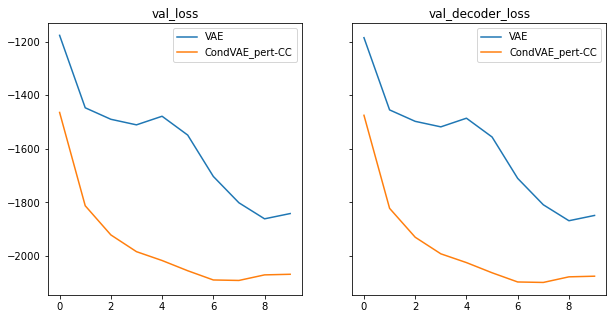

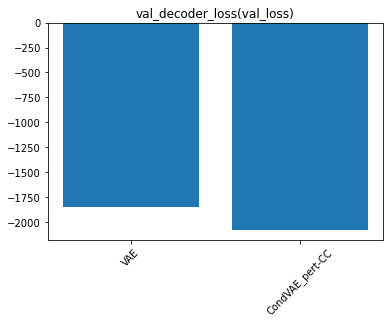

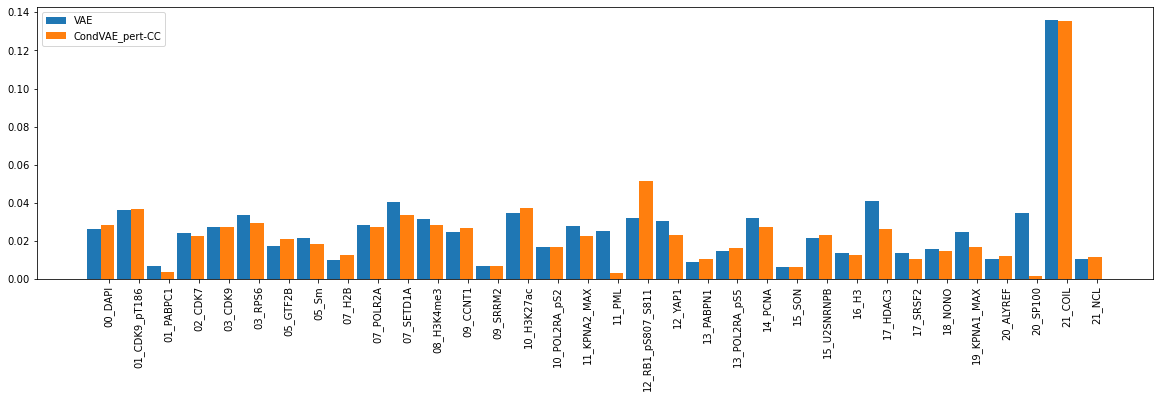

In [5]:
comp.plot_history(values=["val_loss", "val_decoder_loss"])
comp.plot_final_score(score="val_decoder_loss", fallback_score="val_loss", save_prefix="decoder_loss_")
comp.plot_per_channel_mse()

The two example images show that both models can predict the original inputs well

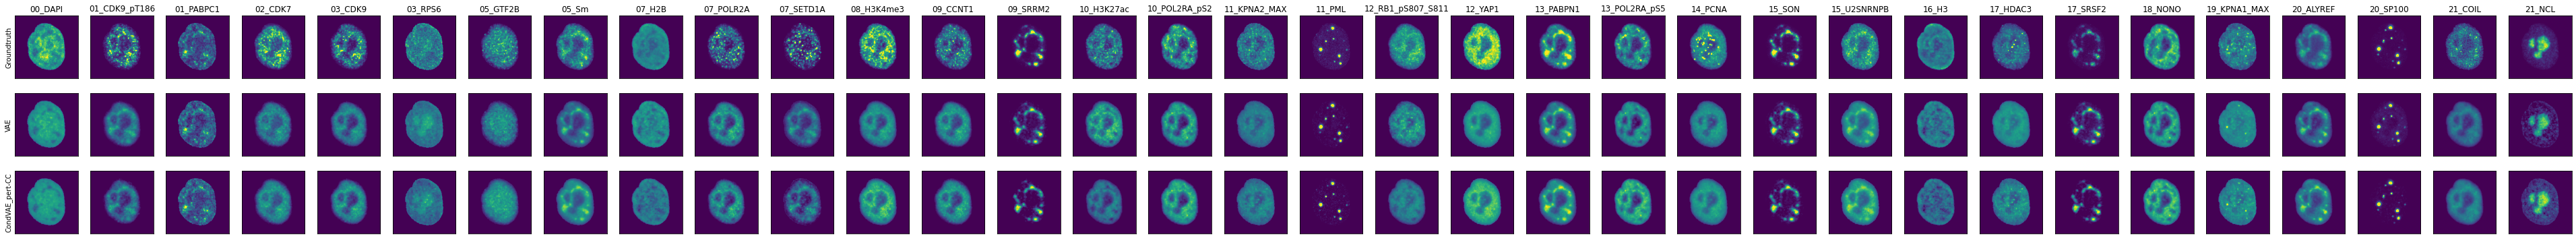

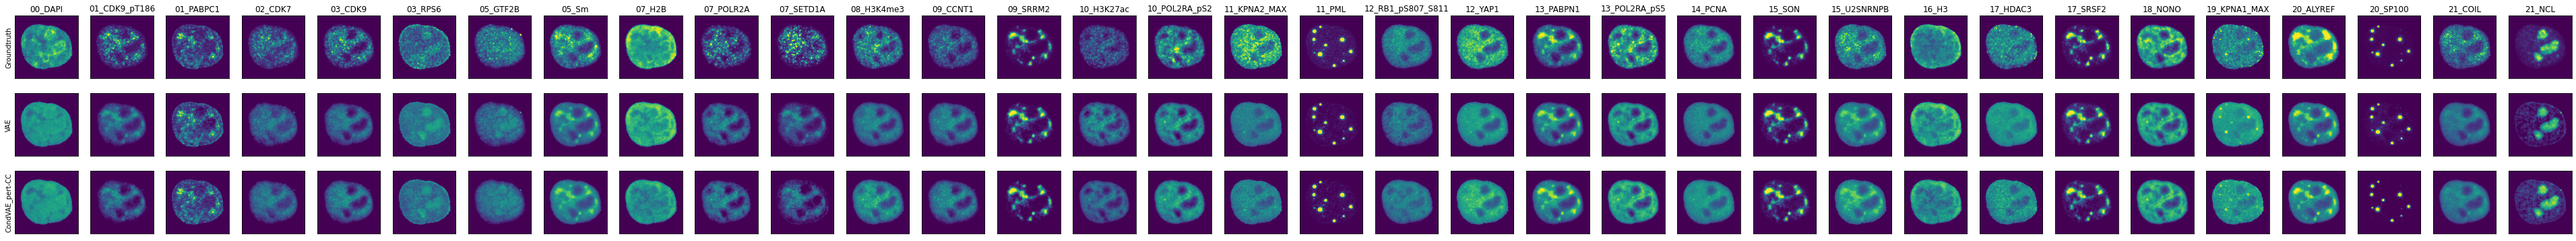

In [6]:
comp.plot_predicted_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
)

The example leiden clustering (here with resolution 0.2 as set in the `experiment_params.py`) shows some differences between the models.
Even on these two example cells, the `MPPleiden` experiment (direct pixel clustering) seems to be less consistent across the cells. 
The `condVAE` clustering has distinct clusters for the periphery of some of the detected clusters. This is due to the training with a small local neighborhood and the very limited data size in this toy example (only 10 cells from each perturbation). To remove this effect and train without a local neighborhood, set `num_neighbors` in the model definition in the `experiment_params` and in the dataset definition in the `data_params` to 1.

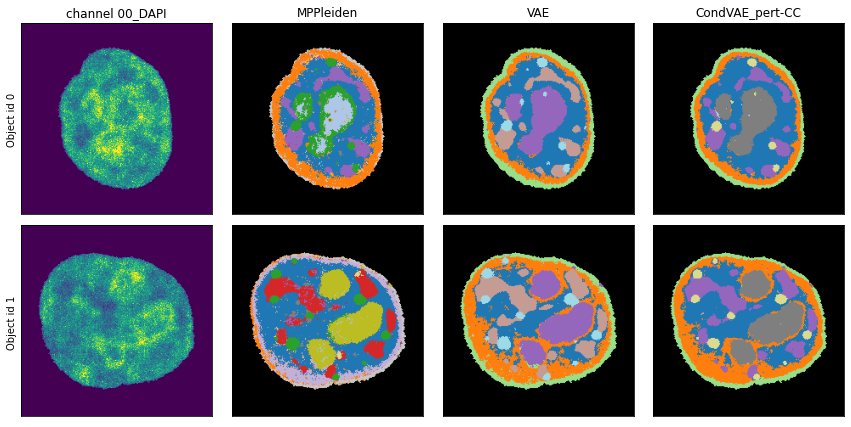

In [7]:
comp.plot_cluster_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
)

The pixel-level UMAP representations of the learned latent representations and the original molecular pixel profiles show that the `condVAE` integrated the two perturbation best. In the two other UMAPs, several clusters are entirely only in one perturbation

/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val
['perturbation_duration', 'cell_cycle']


/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'plate_name' as categorical
/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'well_name' as categorical
/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categ

/home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val
['perturbation_duration', 'cell_cycle']


/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'plate_name_cell' as categorical
/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'well_name_cell' as categorical
/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pa

/home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val


/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'plate_name' as categorical
/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'well_name' as categorical
/home/icb/hannah.spitzer/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categ

['perturbation_duration', 'cell_cycle']


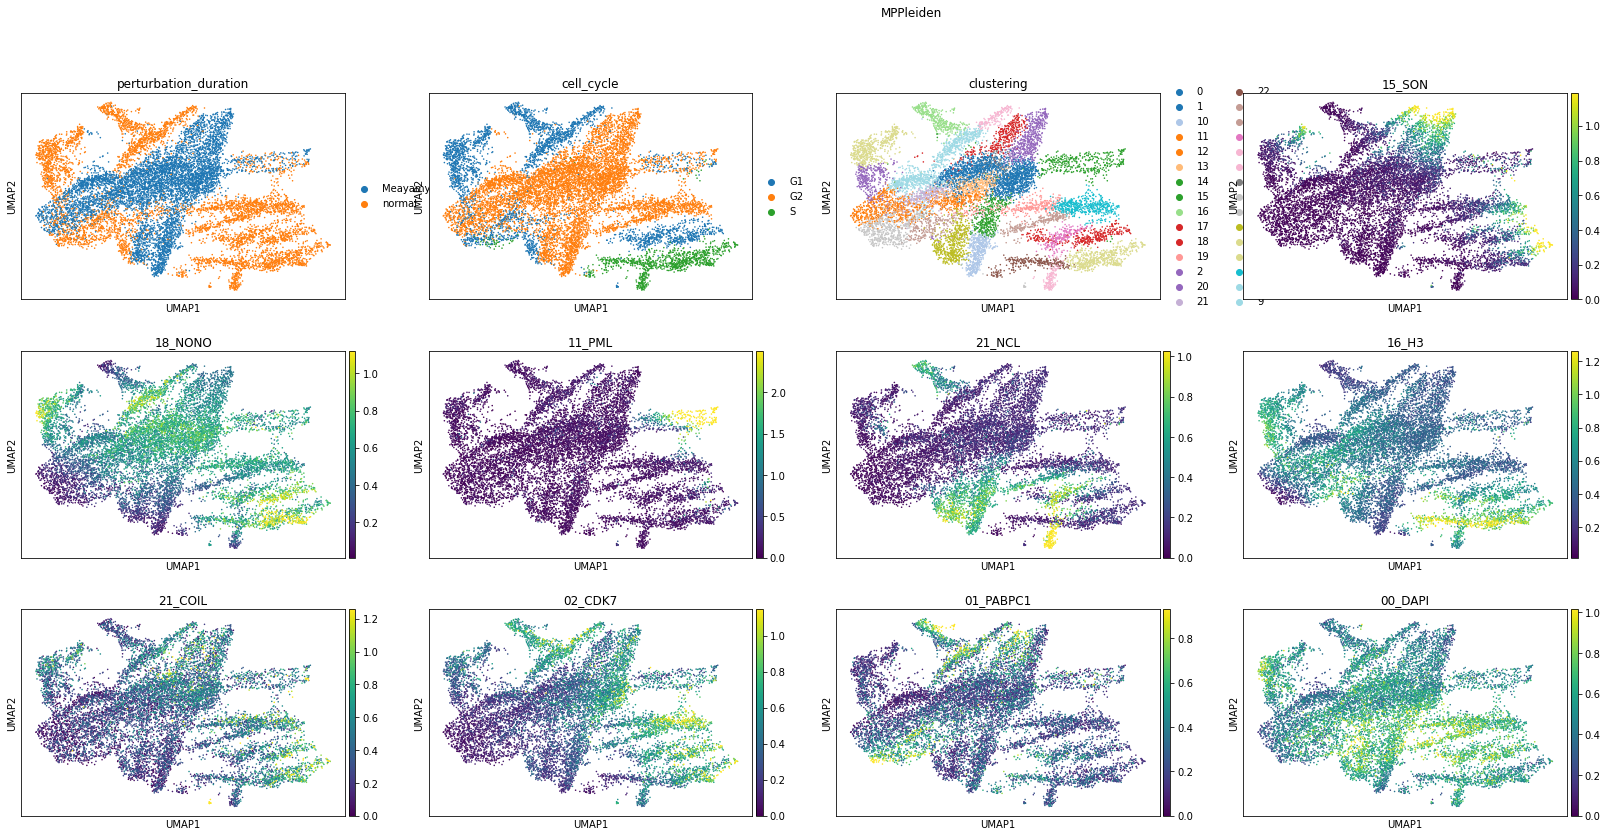

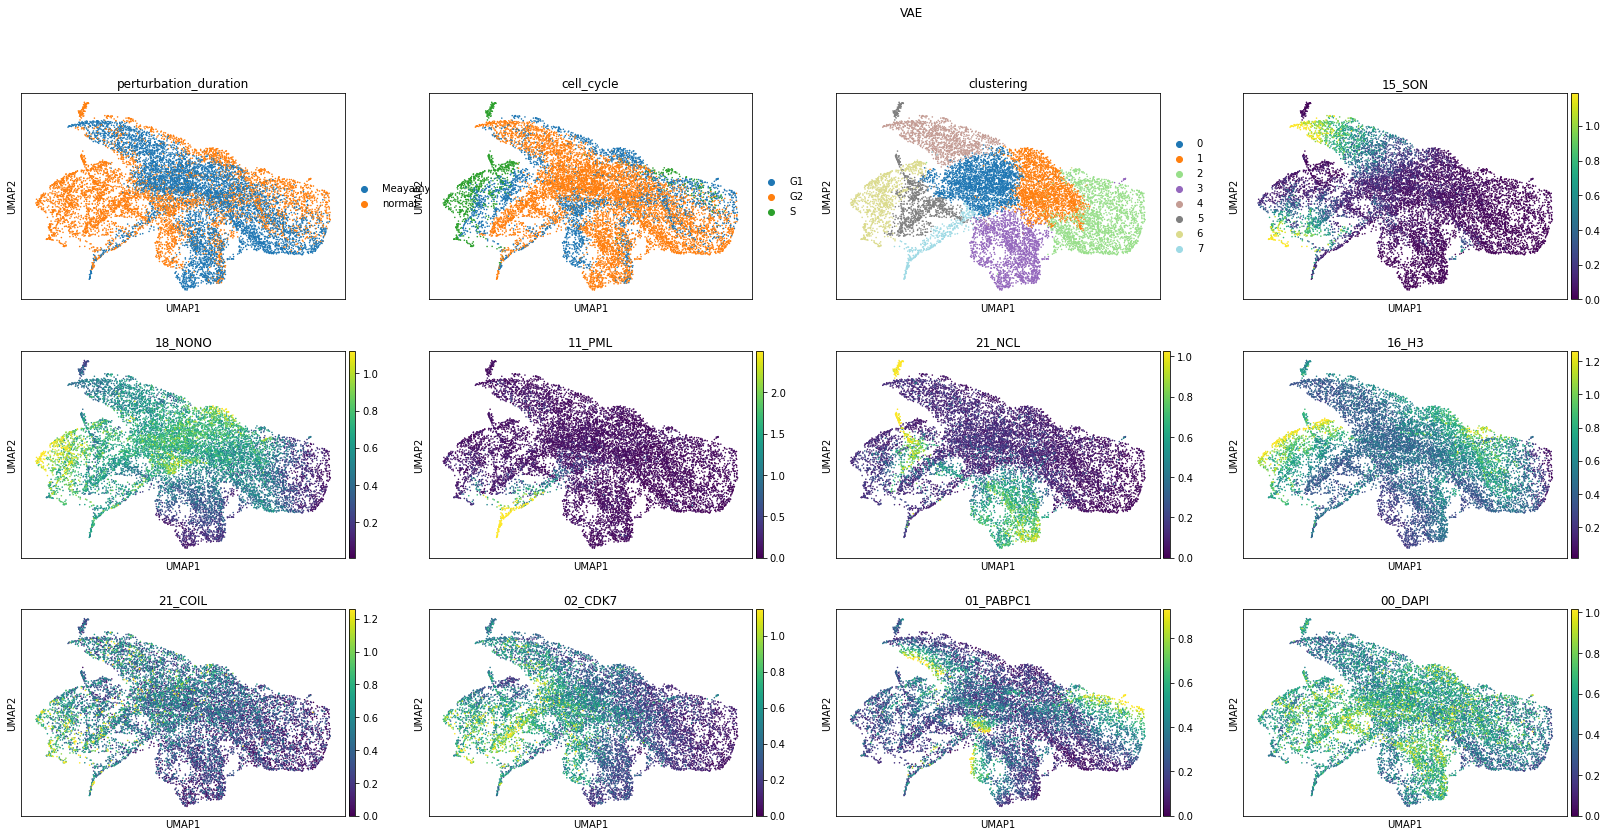

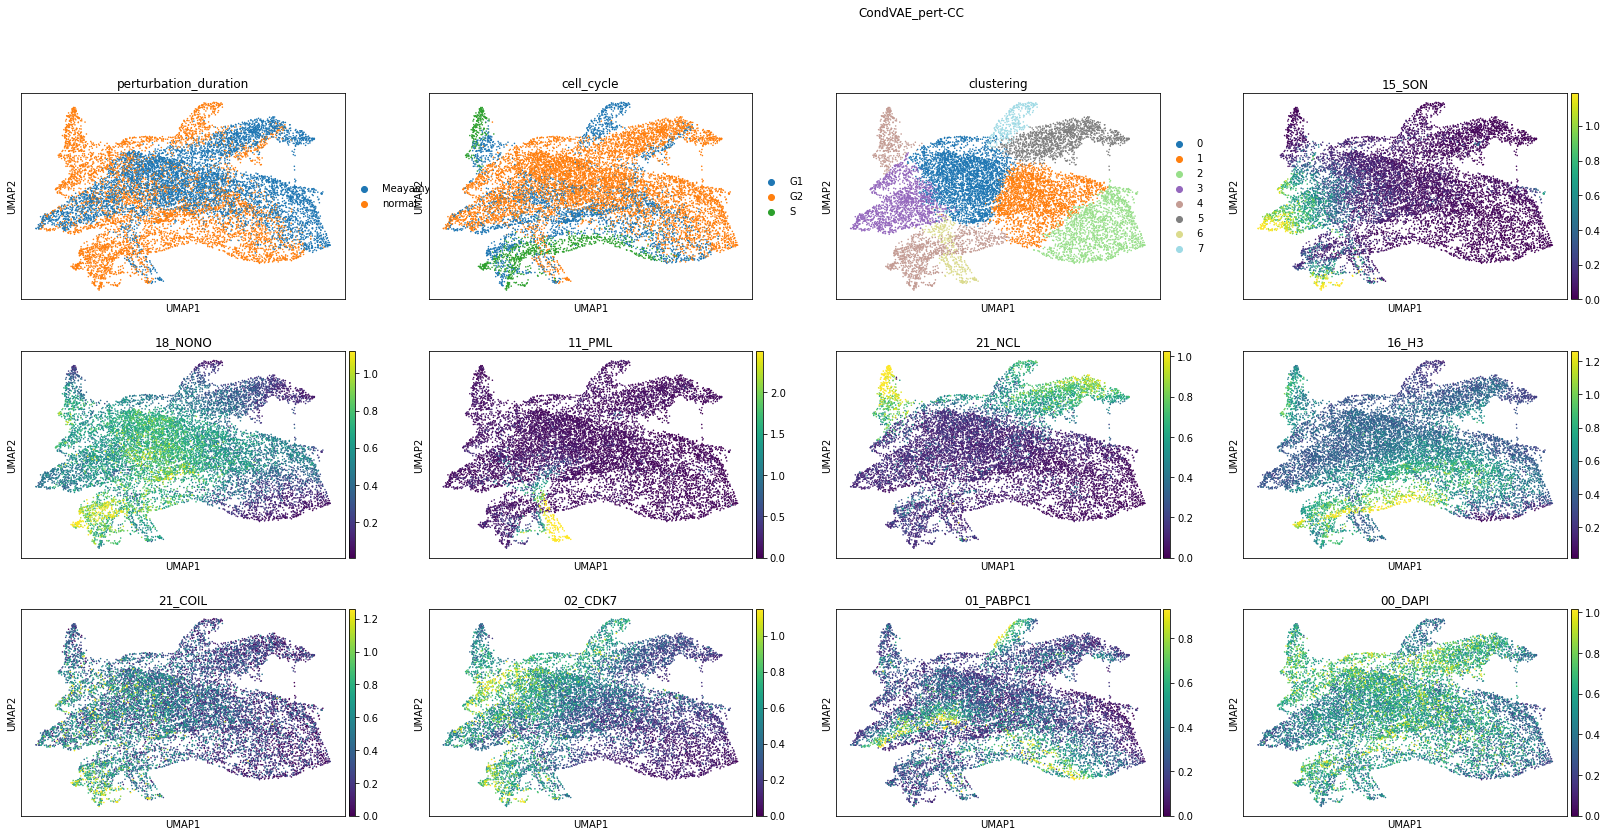

In [8]:
comp.plot_umap()